### Importação dos dados



In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import folium
from folium.plugins import HeatMap

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)
loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [ ]:
lojas = ['Loja1', 'Loja2', 'Loja3', 'Loaja4']
faturamento = []
faturamento.append(round(float(loja['Preço'].sum()), 2))
faturamento.append(round(float(loja2['Preço'].sum()), 2))
faturamento.append(round(float(loja3['Preço'].sum()), 2))
faturamento.append(round(float(loja4['Preço'].sum()), 2))
faturamento_lojas = tuple(zip(lojas, faturamento))
print(f'Faturamento das lojas: {faturamento_lojas}')


Faturamento das lojas: (('Loja1', 1534509.12), ('Loja2', 1488459.06), ('Loja3', 1464025.03), ('Loaja4', 1384497.58))


Gráfico de barras do faturamento das quatro lojas

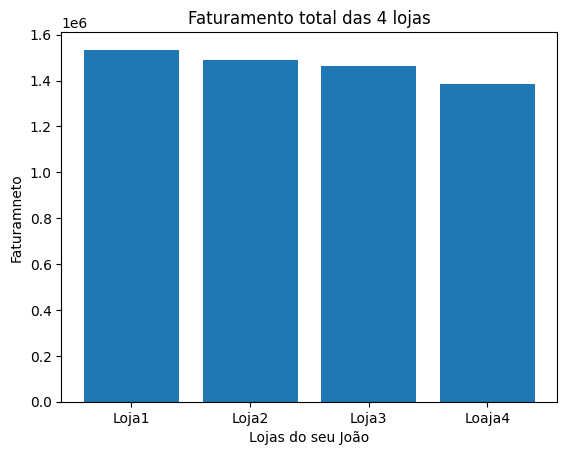

In [ ]:
plt.bar(lojas, faturamento)
plt.ylabel('Faturamneto')
plt.xlabel('Lojas do seu João')
plt.title('Faturamento total das 4 lojas')
plt.show()

# 2. Vendas por Categoria


In [ ]:
#a classe Counter da biblioteca colletions, vai contar quantas vezes cada elemento aparece em uma lista, tupla, etc
categorias_loja1 = Counter(loja['Categoria do Produto']).most_common()
categorias_loja2 = Counter(loja2['Categoria do Produto']).most_common()
categorias_loja3 = Counter(loja3['Categoria do Produto']).most_common()
categorias_loja4 = Counter(loja4['Categoria do Produto']).most_common()
print(f'A categoiria mais vendida da loja 1 são os {categorias_loja1[0]} e a menos vendida são os {categorias_loja1[-1]}, com {len(categorias_loja1)} categorias')
print(f'A categoiria mais vendida da loja 2 são os {categorias_loja2[0]} e a menos vendida são os {categorias_loja2[-1]}, com {len(categorias_loja2)} categorias')
print(f'A categoiria mais vendida da loja 3 são os {categorias_loja3[0]} e a menos vendida são os {categorias_loja3[-1]}, com {len(categorias_loja3)} categorias')
print(f'A categoiria mais vendida da loja 4 são os {categorias_loja4[0]} e a menos vendida são os {categorias_loja4[-1]}, com {len(categorias_loja4)} categorias')

A categoiria mais vendida da loja 1 são os ('moveis', 465) e a menos vendida são os ('utilidades domesticas', 171), com 8 categorias
A categoiria mais vendida da loja 2 são os ('moveis', 442) e a menos vendida são os ('utilidades domesticas', 181), com 8 categorias
A categoiria mais vendida da loja 3 são os ('moveis', 499) e a menos vendida são os ('utilidades domesticas', 177), com 8 categorias
A categoiria mais vendida da loja 4 são os ('moveis', 480) e a menos vendida são os ('instrumentos musicais', 170), com 8 categorias


# 3. Média de Avaliação das Lojas

In [ ]:
media_avaliacao_loja1 = round(loja['Avaliação da compra'].sum()/len(loja['Avaliação da compra']), 2)
media_avaliacao_loja2 = round(loja2['Avaliação da compra'].sum()/len(loja2['Avaliação da compra']), 2)
media_avaliacao_loja3 = round(loja3['Avaliação da compra'].sum()/len(loja3['Avaliação da compra']), 2)
media_avaliacao_loja4 = round(loja4['Avaliação da compra'].sum()/len(loja4['Avaliação da compra']), 2)

Ordenar da loja mais bem avalida para a menos avaliada.

[np.float64(3.98), np.float64(4.04), np.float64(4.05), np.float64(4.0)]


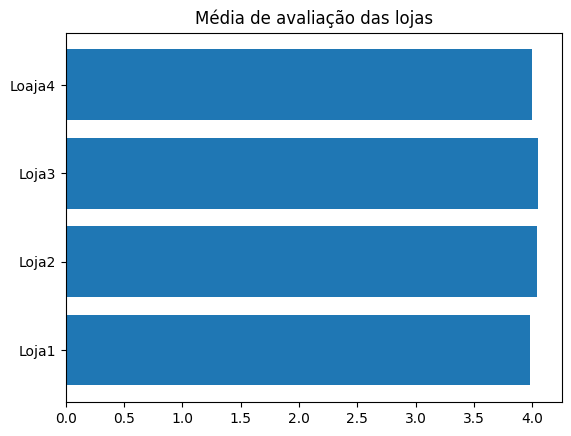

In [ ]:
media_avaliacao = []
media_avaliacao.append(media_avaliacao_loja1)
media_avaliacao.append(media_avaliacao_loja2)
media_avaliacao.append(media_avaliacao_loja3)
media_avaliacao.append(media_avaliacao_loja4)
print(media_avaliacao)

plt.barh(lojas, media_avaliacao)
plt.title('Média de avaliação das lojas')
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [ ]:
#o Counter cria um objeto, que é uma sub classe de um dicionário,  que contabiliza quantas vezes cada valor aparece
#O método most_common() retorna uma lista de tuplas, onde cada tupla contém um produto e sua respectiva contagem, ordenada pela frequência, da mais comum para a menos comum.
produtos_loja1 = Counter(loja['Produto']).most_common()
produtos_loja2 = Counter(loja2['Produto']).most_common()
produtos_loja3 = Counter(loja3['Produto']).most_common()
produtos_loja4 = Counter(loja4['Produto']).most_common()
print(f'Os produtos mais vendidos da Loja1 é o {produtos_loja1[0]},  {produtos_loja1[1]},  {produtos_loja1[2]} e o menos vendido é o {produtos_loja1[-1]}, , com uma variedade de {len(produtos_loja1)} produtos')
print(f'O produto mais vendido da Loja2 é o {produtos_loja2[0]} e o menos vendido é o {produtos_loja2[-1]}, com uma variedade de {len(produtos_loja2)} produtos')
print(f'O produto mais vendido da Loja3 é o {produtos_loja3[0]} e o menos vendido é o {produtos_loja3[-1]}, com uma variedade de {len(produtos_loja3)} produtos')
print(f'O produto mais vendido da Loja4 é o {produtos_loja4[0]} e o menos vendido é o {produtos_loja4[-1]}, com uma variedade de {len(produtos_loja4)} produtos')

Os produtos mais vendidos da Loja1 é o ('Micro-ondas', 60),  ('TV Led UHD 4K', 60),  ('Guarda roupas', 60) e o menos vendido é o ('Celular ABXY', 33), , com uma variedade de 51 produtos
O produto mais vendido da Loja2 é o ('Iniciando em programação', 65) e o menos vendido é o ('Jogo de tabuleiro', 32), com uma variedade de 51 produtos
O produto mais vendido da Loja3 é o ('Kit banquetas', 57) e o menos vendido é o ('Blocos de montar', 35), com uma variedade de 51 produtos
O produto mais vendido da Loja4 é o ('Cama box', 62) e o menos vendido é o ('Guitarra', 33), com uma variedade de 51 produtos


# 5. Frete Médio por Loja


In [ ]:
frete_medio_loja1 = round(loja['Frete'].mean(), 2)
frete_medio_loja2 = round(loja2['Frete'].mean(), 2)
frete_medio_loja3 = round(loja3['Frete'].mean(), 2)
frete_medio_loja4 = round(loja4['Frete'].mean(), 2)
print(f'O frete médio da loja 1 é de {frete_medio_loja1} reais')
print(f'O frete médio da loja 2 é de {frete_medio_loja2} reais')
print(f'O frete médio da loja 3 é de {frete_medio_loja3} reais')
print(f'O frete médio da loja 4 é de {frete_medio_loja4} reais')
frete_lojas = [frete_medio_loja1, frete_medio_loja2, frete_medio_loja3, frete_medio_loja4]

O frete médio da loja 1 é de 34.69 reais
O frete médio da loja 2 é de 33.62 reais
O frete médio da loja 3 é de 33.07 reais
O frete médio da loja 4 é de 31.28 reais


Text(0.5, 1.0, 'Percentual do frete médio pago por cada loja em relação ao frete médio total')

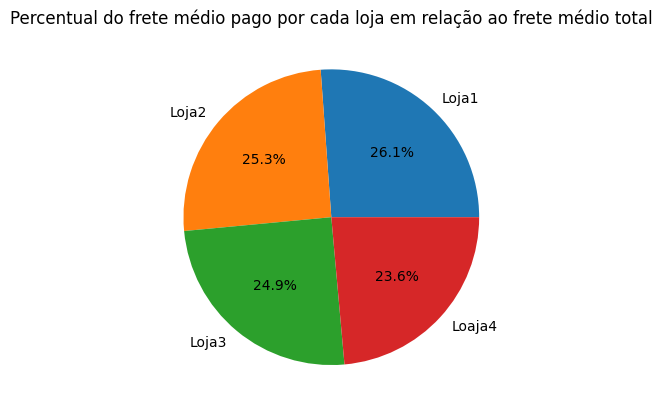

In [ ]:
plt.pie(frete_lojas, labels = lojas, autopct='%1.1f%%')
plt.title('Percentual do frete médio pago por cada loja em relação ao frete médio total')

#6. Analise descritiva dos dados obtidos

Com base nos dados fornecidos, foram desenvolvidas 5 métricas com o objetivo de escolher qual loja o Sr. João deveria manter. Além dessas métricas, foram criados 3 gráficos: um gráfico de barras com o faturamento médio de cada loja (Faturamento total das 4 lojas), um gráfico de colunas com a média de avaliação dos produtos de cada loja (Média de avaliação das lojas) e um gráfico de setores abordando o frete médio por venda de cada loja em comparação ao frete médio total pago por todas as lojas juntas (Percentual do frete médio pago por cada loja em relação ao frete médio total).

##Análise do Faturamento Médio
No gráfico Faturamento total das 4 lojas, percebe-se que as quatro lojas possuem um faturamento muito próximo. A Loja 1 apresenta o maior faturamento, com  1.534.509,12 reais , enquanto a Loja 4 apresenta o menor, com  1.384.497,58 reais.

##Análise da Categoria Mais Vendida
Ao analisar a categoria mais vendida em cada loja, percebe-se que os "Móveis" são os mais vendidos em todas. Já as "Utilidades domésticas" são as menos vendidas, com exceção da Loja 4, onde a categoria menos vendida é "Instrumentos musicais". Todas as lojas possuem a mesma quantidade de categorias disponíveis para venda.

##Análise da Média de Avaliações
Após verificar as médias de avaliações, conclui-se que todas as lojas possuem boas notas, girando em torno de 4. No gráfico Média de avaliação das lojas, percebe-se que a diferença entre elas é pequena, mas a Loja 1 tem a menor média (3,98), enquanto a Loja 4 se destaca positivamente com a melhor média (4,05).

##Análise dos Produtos Mais e Menos Vendidos
Loja 1: mais vendidos – Micro-ondas, TV LED UHD 4K, Guarda-roupas (60 unidades); menos vendido – Celular ABXY (33 unidades).

Loja 2: mais vendido – Iniciando em Programação (65 unidades); menos vendido – Jogo de tabuleiro (32 unidades).

Loja 3: mais vendido – Kit Banquetas (57 unidades); menos vendido – Blocos de Montar (35 unidades).

Loja 4: mais vendido – Cama Box (62 unidades); menos vendido – Guitarra (33 unidades).

##Análise do Frete Médio por Loja
Ao analisar o frete médio das lojas, percebe-se que todas possuem valores próximos. Porém, o gráfico Percentual do frete médio pago por cada loja em relação ao frete médio total destaca a Loja 1 como a que mais gasta com frete por venda, enquanto a Loja 4 é a que menos gasta.

##Conclusão
Se considerarmos apenas o faturamento, a Loja 1 parece ser a melhor opção, pois fatura mais. No entanto, ao observar outras métricas, nota-se que a situação muda. A Loja 1 tem a pior média de avaliação, o que indica experiências negativas por parte dos clientes. Isso pode afetar a fidelização e a atração de novos consumidores.Ela também é a loja com o maior custo médio de frete, o que compromete a margem de lucro – especialmente se esse custo não estiver sendo repassado ao cliente final.
Embora fature mais, a diversidade e quantidade de produtos vendidos são semelhantes às das outras lojas. Isso pode indicar que o faturamento elevado foi resultado de alguma queima de estoque ou descontos agressivos, não refletindo uma performance consistente. Logo a loja 1 é a que o senhor João deveria pensar em fechar.

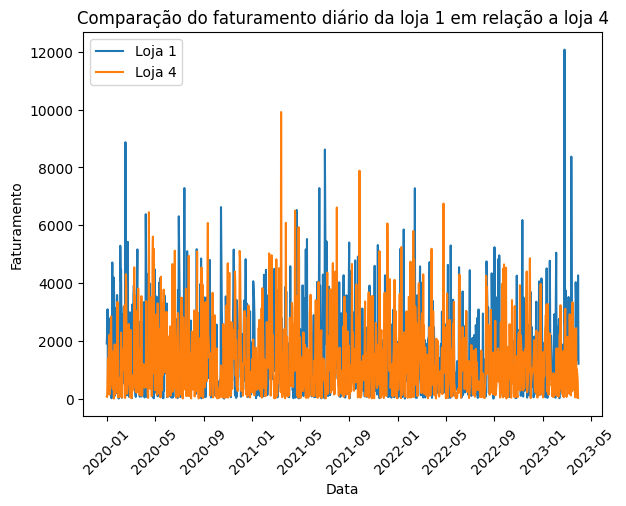

In [ ]:
#Converte a coluna "Data da Compra" para data_time para que o pandas entenda como datas
loja['Data da Compra'] = pd.to_datetime(loja['Data da Compra'])
loja4['Data da Compra'] = pd.to_datetime(loja4['Data da Compra'])
#Agrupa as vendas por data em cada loja e soma o valor total vendido naquele dia.
vendas_por_dia_loja1 = loja.groupby('Data da Compra')['Preço'].sum()
vendas_por_dia_loja4 = loja4.groupby('Data da Compra')['Preço'].sum()
#pltando o gráfico de linhas com base nas pandas.series
plt.plot(vendas_por_dia_loja1.index, vendas_por_dia_loja1.values, label='Loja 1')
plt.plot(vendas_por_dia_loja4.index, vendas_por_dia_loja4.values, label='Loja 4')

plt.xlabel('Data')
plt.ylabel('Faturamento')
plt.title('Comparação do faturamento diário da loja 1 em relação a loja 4')
plt.legend()
plt.tight_layout()
plt.xticks(rotation=45, fontsize=10)  # rotaciona e aumenta a fonte das datas
plt.show()
#baseado em https://www.datacamp.com/pt/tutorial/line-plots-in-matplotlib-with-python

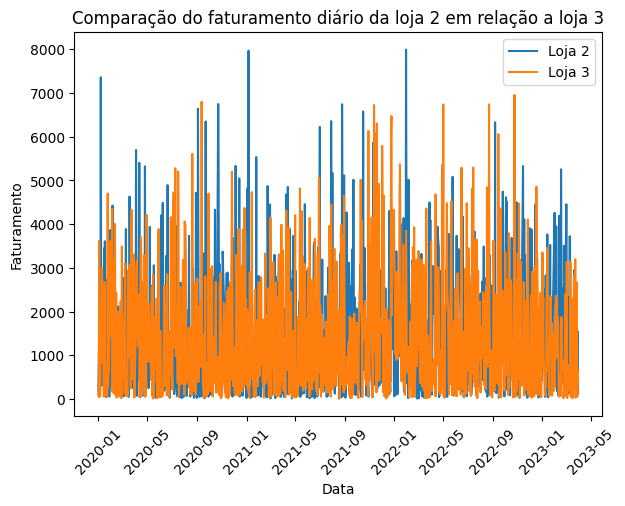

In [ ]:
loja2['Data da Compra'] = pd.to_datetime(loja2['Data da Compra'])
loja3['Data da Compra'] = pd.to_datetime(loja3['Data da Compra'])
#Agrupa as vendas por data em cada loja e soma o valor total vendido naquele dia.
vendas_por_dia_loja2 = loja2.groupby('Data da Compra')['Preço'].sum()
vendas_por_dia_loja3 = loja3.groupby('Data da Compra')['Preço'].sum()
#pltando o gráfico de linhas com base nas pandas.series
plt.plot(vendas_por_dia_loja2.index, vendas_por_dia_loja2.values, label='Loja 2')
plt.plot(vendas_por_dia_loja3.index, vendas_por_dia_loja3.values, label='Loja 3')

plt.xlabel('Data')
plt.ylabel('Faturamento')
plt.title('Comparação do faturamento diário da loja 2 em relação a loja 3')
plt.legend()
plt.tight_layout()
plt.xticks(rotation=45, fontsize=10)  # rotaciona e aumenta a fonte das datas
plt.show()

Com base no gráfico mostrado, é possível perceber um aumento adrúpto das vendas da loja 1 entre Janeiro e Fevereiro de 2023, que pode ser decorrente de uma campanha promocional, se comparado com as demais lojas.

#Desafio Extra


In [31]:
# Convertemos as colunas  lat e lon para float
loja['lat'] = loja['lat'].astype(float)
loja['lon'] = loja['lon'].astype(float)
loja2['lat'] = loja2['lat'].astype(float)
loja2['lon'] = loja2['lon'].astype(float)
loja3['lat'] = loja3['lat'].astype(float)
loja3['lon'] = loja3['lon'].astype(float)
loja4['lat'] = loja4['lat'].astype(float)
loja4['lon'] = loja4['lon'].astype(float)

# Criando um mapa com as médias das longitudes e latitudes afim de melhor exibir os demais pontos
heatmap_loja1 = folium.Map(location=[loja['lat'].mean(), loja['lon'].mean()], zoom_start=4.2)

# Preparamos os dados para o heatmap (lista de listas com [lat, lon])
localizacoes_vendas_loja1 = loja[['lat', 'lon']].values.tolist()

# Adiciona o HeatMap ao mapa
HeatMap(localizacoes_vendas_loja1, radius=10, blur=15).add_to(heatmap_loja1)
folium.TileLayer('OpenStreetMap').add_to(heatmap_loja1)
folium.TileLayer('Cartodb Positron').add_to(heatmap_loja1)
folium.TileLayer('Cartodb dark_matter').add_to(heatmap_loja1)
folium.TileLayer('OPNVKarte').add_to(heatmap_loja1)
folium.TileLayer('CyclOSM').add_to(heatmap_loja1)
folium.LayerControl().add_to(heatmap_loja1)

heatmap_loja1
#baseado no artigo 'Interesting Heatmaps Using Python Folium'  do Medium disponível em https://medium.com/%40vinodvidhole/interesting-heatmaps-using-python-folium-ee41b118a996